# Import necessary libraries

In [8]:
import sys
import os
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from time_series import TimeSeriesAnalysis
from correlation_analysis import CorrelationHeatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [9]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Display the first few rows of the datafram

In [10]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


# Summary Statistics

In [11]:
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

# Data Quality Check

In [12]:
print(df.isnull().sum())  # Check for missing values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


# Time Series Analysis

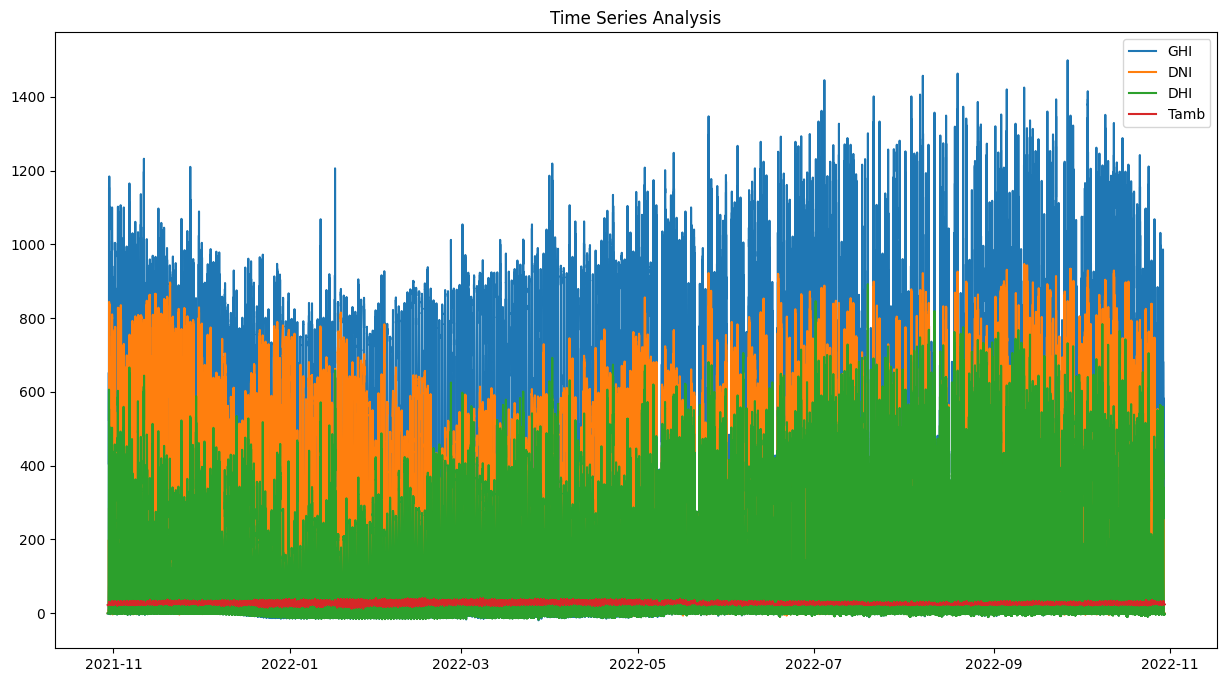

In [13]:
# Time series analysis
time_series = TimeSeriesAnalysis(df)
time_series.plot_time_series(['GHI', 'DNI', 'DHI', 'Tamb'])

# Correlation Analysis

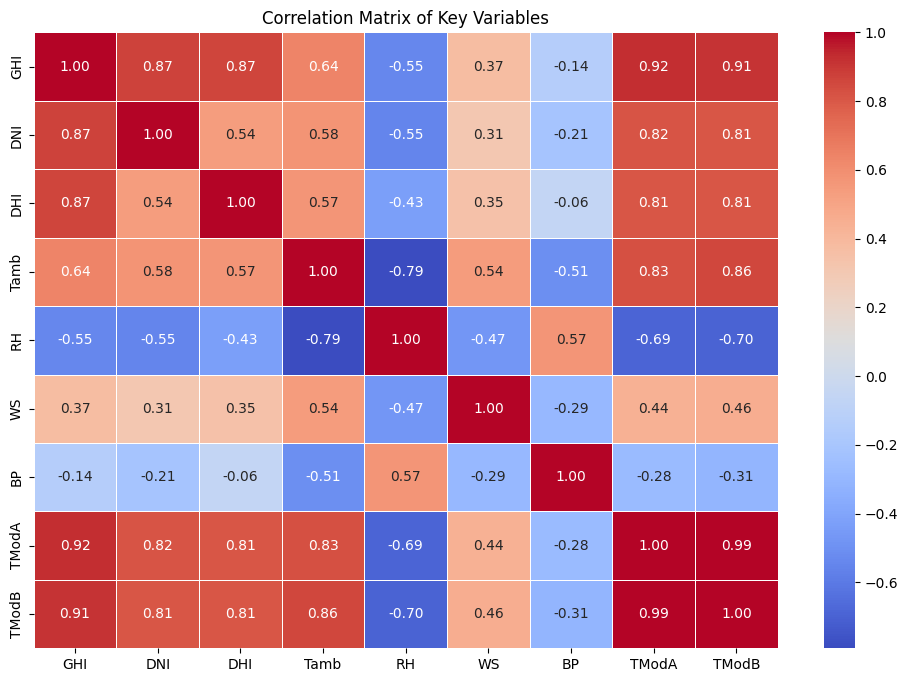

In [14]:
# Correlation heatmap analysis
heatmap = CorrelationHeatmap(df)
heatmap.plot_correlation_matrix(['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'TModA', 'TModB'], 'Correlation Matrix of Key Variables')

# Wind Analysis

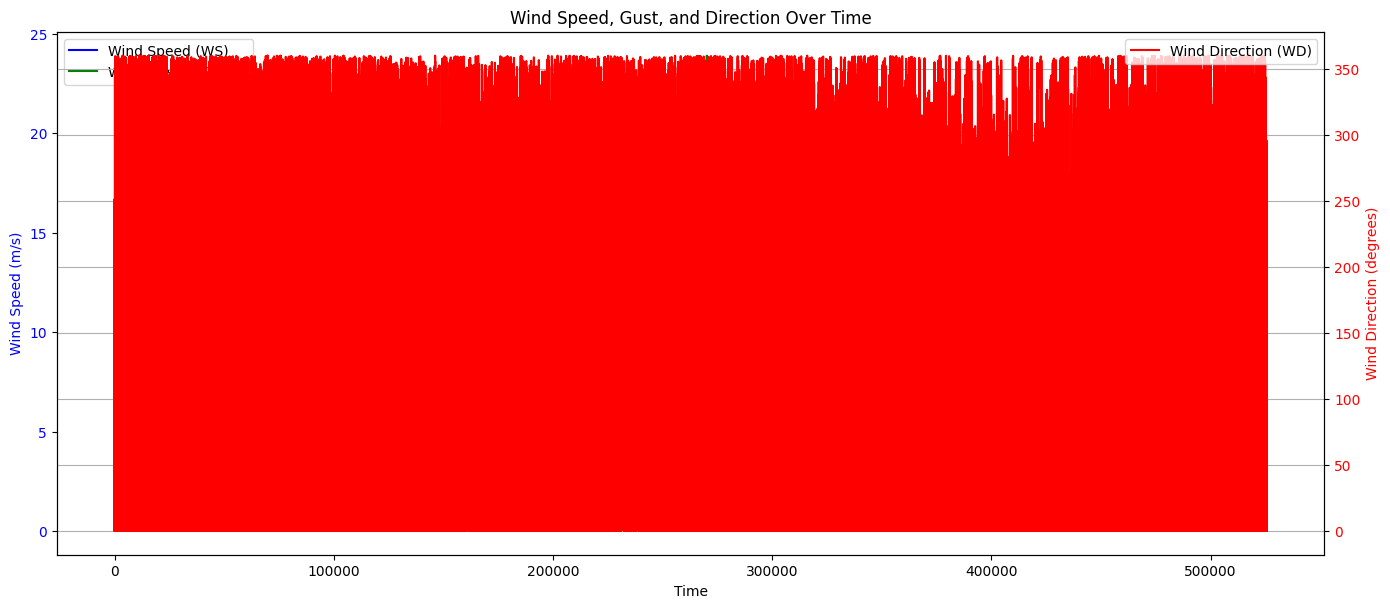

In [15]:
def plot_wind_analysis(df):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Wind speed and gust speed
    ax1.plot(df.index, df['WS'], label='Wind Speed (WS)', color='blue')
    ax1.plot(df.index, df['WSgust'], label='Wind Gust (WSgust)', color='green')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Wind Speed (m/s)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Wind direction on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df.index, df['WD'], label='Wind Direction (WD)', color='red')
    ax2.set_ylabel('Wind Direction (degrees)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Plot configurations
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Wind Speed, Gust, and Direction Over Time')
    plt.grid(True)
    plt.show()

# Wind Speed and Direction Analysis
plot_wind_analysis(df)


# Temprature Analysis

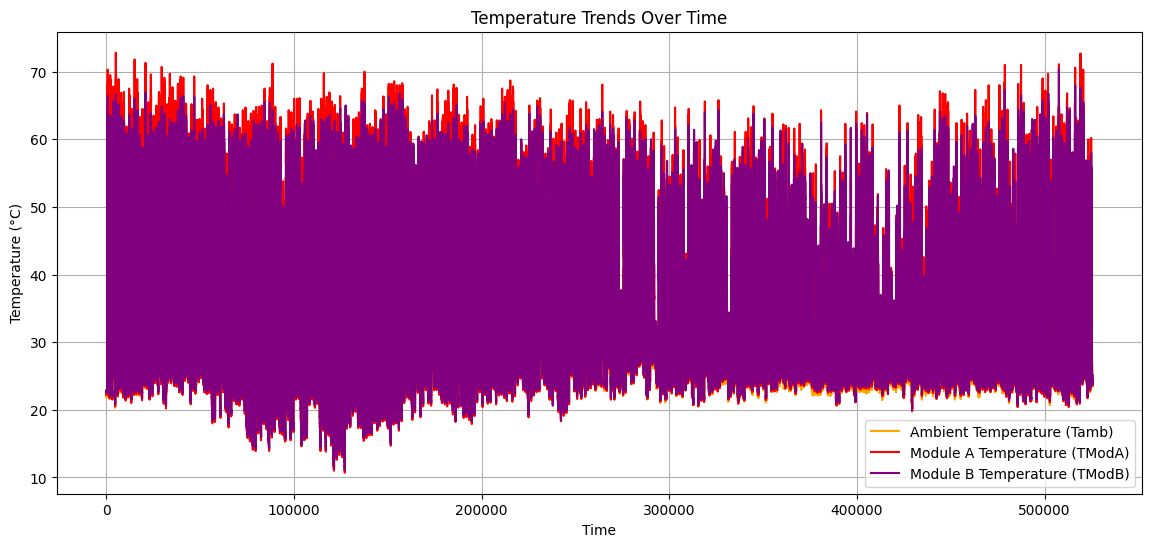

In [16]:
def plot_temperature_analysis(df):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Tamb'], label='Ambient Temperature (Tamb)', color='orange')
    plt.plot(df.index, df['TModA'], label='Module A Temperature (TModA)', color='red')
    plt.plot(df.index, df['TModB'], label='Module B Temperature (TModB)', color='purple')
    plt.title('Temperature Trends Over Time')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Temperature Trends Analysis
plot_temperature_analysis(df)

# Histogram

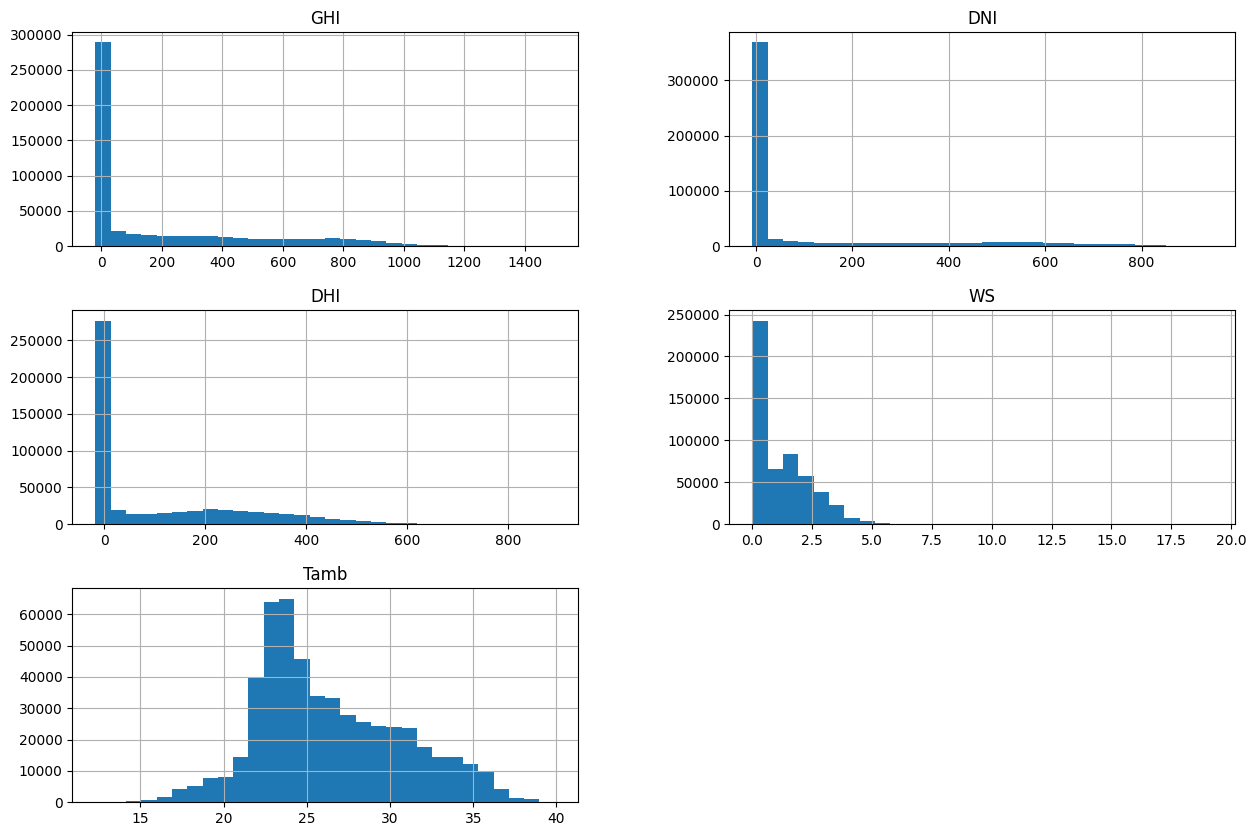

In [17]:
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots

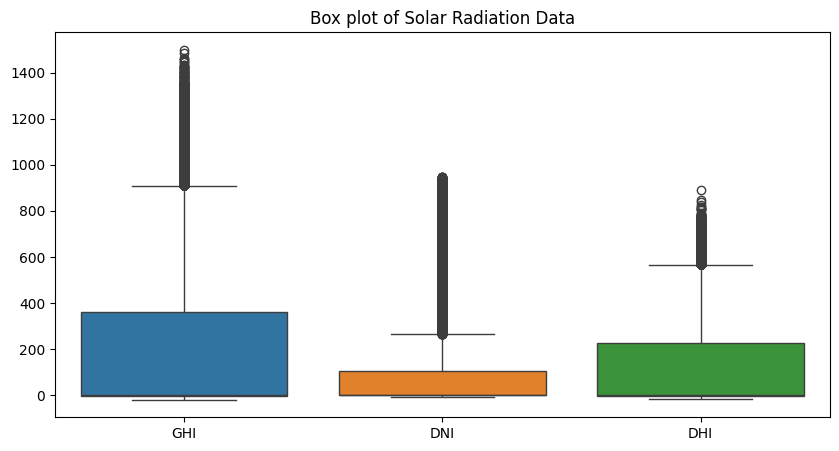

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Box plot of Solar Radiation Data')
plt.show()


# Scatter Plots

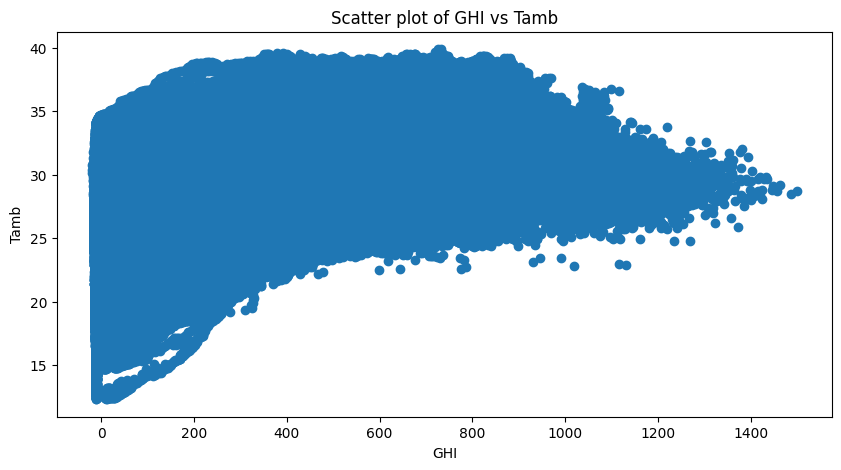

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(df['GHI'], df['Tamb'])
plt.title('Scatter plot of GHI vs Tamb')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()

# Z-score Anlysis

In [20]:
import numpy as np

# Function to calculate Z-Score
def z_score_analysis(data, columns, threshold=3):
    z_scores = (data[columns] - data[columns].mean()) / data[columns].std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return z_scores, outliers

# Example: Apply Z-Score Analysis to the 'Tamb' and 'WS' columns
z_scores, outliers = z_score_analysis(df, ['Tamb', 'WS'])

# Display the Z-Scores
print("Z-Scores for the selected columns:\n", z_scores.head())

# Display the outliers
outlier_data = df[outliers]
print("\nRows identified as outliers:\n", outlier_data)


Z-Scores for the selected columns:
        Tamb        WS
0 -1.004726 -0.924845
1 -1.004726 -0.924845
2 -1.004726 -0.924845
3 -1.004726 -0.924845
4 -1.004726 -0.924845

Rows identified as outliers:
                  Timestamp    GHI  DNI    DHI   ModA   ModB  Tamb    RH   WS  \
1279   2021-10-30 21:20:00   -1.0 -0.1   -1.1    0.0    0.0  25.4  81.7  5.1   
2495   2021-10-31 17:36:00   35.2  3.6   34.3   35.1   33.1  31.2  66.8  7.5   
2496   2021-10-31 17:37:00   28.9  0.3   29.0   30.8   29.0  30.9  66.7  6.2   
2497   2021-10-31 17:38:00   26.0  0.2   26.2   29.3   27.8  30.6  63.6  5.2   
2498   2021-10-31 17:39:00   24.6  0.2   24.8   28.9   27.4  30.2  63.6  5.3   
...                    ...    ...  ...    ...    ...    ...   ...   ...  ...   
522184 2022-10-27 15:05:00  167.2 -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185 2022-10-27 15:06:00  163.4 -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194 2022-10-27 15:15:00  183.5  0.3  181.6  173.7  168.7  29.3  70.2  4.9   
5

# Bubble Chart

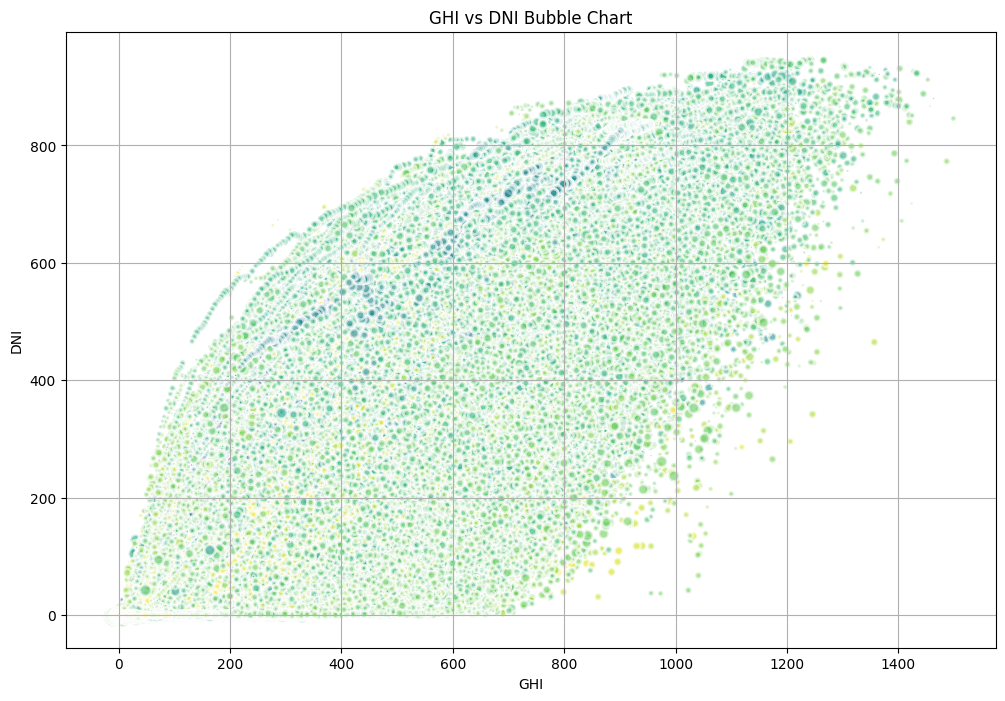

In [21]:
import matplotlib.pyplot as plt

# Function to create a Bubble Chart
def plot_bubble_chart(df, x_column, y_column, size_column, color_column=None, title="Bubble Chart"):
    plt.figure(figsize=(12, 8))
    
    # Plot bubbles
    plt.scatter(df[x_column], df[y_column], 
                s=df[size_column] * 10,  # Scale the size of bubbles
                c=df[color_column] if color_column else 'blue',  # Color by another variable or default to blue
                alpha=0.6, edgecolors="w", linewidth=2)
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example: Create a Bubble Chart for GHI vs DNI with WS as bubble size and RH as color
plot_bubble_chart(df, x_column='GHI', y_column='DNI', size_column='WS', color_column='RH', title="GHI vs DNI Bubble Chart")

# Data Cleaning

In [22]:
df = df.drop(columns=['Comments'])  # Drop the 'Comments' column as it is entirely null